## Observations and Insights 

In [30]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#determine appropriate 
#mouse_metadata.head()
#study_results.head()
# Combine the data into a single dataset (inner)
merged_data = pd.merge(mouse_metadata,study_results, on='Mouse ID')
#display
merged_data.head(11)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [3]:
# Checking the number of mice in the DataFrame.
mice_number = len(merged_data['Mouse ID'].value_counts())
print(f'The number of Mice in the study is: {mice_number}')
#merged_data['Mouse ID'].value_counts()

The number of Mice in the study is: 249


In [28]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates = merged_data.loc[merged_data.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
# create a clean data frame without duplicates
clean_merged_data = merged_data[merged_data['Mouse ID'].isin(duplicates)==False]
#checking differences in data frames after clean up
clean_merged_data['Mouse ID'].value_counts()

a644    10
f545    10
r811    10
l897    10
a492    10
        ..
d133     1
o848     1
v199     1
b447     1
l872     1
Name: Mouse ID, Length: 248, dtype: int64

In [11]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicates

909    g989
911    g989
913    g989
915    g989
917    g989
Name: Mouse ID, dtype: object

In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
# create a clean data frame without duplicates
clean_merged_data = merged_data[merged_data['Mouse ID'].isin(duplicates)==False]

In [9]:
# Checking the number of mice in the clean DataFrame.
len(clean_merged_data['Mouse ID'].value_counts())

248

## Summary Statistics

In [43]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
drug_data = clean_merged_data.groupby(['Drug Regimen'])
drug_data.head()
#means of all drugs
tumor_mean = drug_data['Tumor Volume (mm3)'].mean()
#medians
tumor_median = drug_data['Tumor Volume (mm3)'].median()
#variance
var_data = clean_merged_data.groupby(['Drug Regimen']).var()
var_tumor = var_data['Tumor Volume (mm3)']
#standard deviation
std_data = clean_merged_data.groupby(['Drug Regimen']).std()
std_tumor = std_data['Tumor Volume (mm3)']
std_tumor
#Stardard Error of the Mean
SEM_data = clean_merged_data.groupby(['Drug Regimen']).sem()
SEM_tumor = SEM_data['Tumor Volume (mm3)']
SEM_tumor
# This method is the most straightforward, creating multiple series and putting them all together at the end.
tumor_df = pd.DataFrame({'Tumor Vol Mean':tumor_mean,'Tumor Vol Median':tumor_median,
                        'Tumor Vol Variance':var_tumor,'Tumor Vol Std Dev':std_tumor,
                        'Tumor Vol SEM':SEM_tumor})
tumor_df

,Tumor Vol Mean,Tumor Vol Median,Tumor Vol Variance,Tumor Vol Std Dev,Tumor Vol SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

In [59]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
#create data for bar plot
mice_count = drug_data['Mouse ID'].count()
drug_count = merged_data['Drug Regimen'].value_counts()
drug_count
#clean_merged_data.plot()
#clean_merged_data.groupby(['Drug Regimen']).head()


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Placebo      181
Stelasyn     181
Ceftamin     178
Infubinol    178
Propriva     161
Name: Drug Regimen, dtype: int64

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

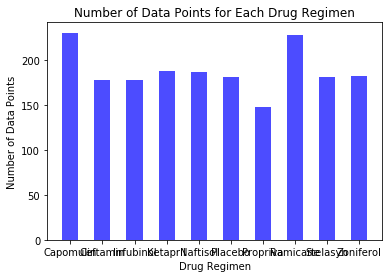

In [94]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
#pyplot graph
study_barplot = plt.bar(mice_count.index,mice_count, color='b', alpha = 0.7, align = 'center',width=0.5,)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title("Number of Data Points for Each Drug Regimen")
plt.tight_layout

## Pie Plots

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 


In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

## Line and Scatter Plots

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen



## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
